# 경사하강법 (Gradient Descent)

### 학습률 (Learning Rate)

- 최적의 해를 빠르게 혹은 천천히 조금씩 찾아가는 '정도'를 가르키는 하이퍼 파라미터
- 기본 값으로 보통 0.001을 사용

### 잔차제곱합 (Residual Sum of Squares, RSS)

- 잔차 = 실제 값 - 예측 값
- 잔차제곱합 = (실제 값 - 예측 값)의 제곱의 합
- 회귀 모델의 정확도를 측정하는 지표
    - RSS가 작을수록 정확하게 예측하는 모델
    - RSS가 클수록 잘못된 예측하는 모델

- 모든 회귀 모델은 RSS가 최소가 되는 방향으로 학습이 진행됨 = 회귀계수(절편)는 RSS가 최소가 되도록 학습
- 비용함수 R(w)가 가장 작을 때의 w를 찾는 것이 회귀 모델의 목표
    - 매 회차에 계산된 R(w)에서 순간변화율(기울기)를 구해야 함 -> 미분 사용
    - 단, 우리가 구해야 하는 회귀계수는 하나 이상이므로 우리는 편미분을 사용함
        - w0(절편)을 고정한 채로 w1의 미분을 구하고, w1을 고정한 채로 w0 미분을 구함

**경사하강법 수식**

$w_1$, $w_0$을 반복적으로 업데이트하며 최적의 회귀계수를 찾음
<br/>
$w_1 = w_1 - η\frac{2}{N}\sum^{N}_{i=1} x_i * (실제값_i - 예측값_i)$
<br/>
$w_0 = w_0 - η\frac{2}{N}\sum^{N}_{i=1}(실제값_i - 예측값_i)$

**경사하강법 공식**

$w1 = w1 - (미분값)$

$w1 = w1 - (-학습률 * 2 / N * (x * (실제값 - 예측값))의 합)$

$w0 = w0 - (미분값)$

$w0 = w0 - (-학습률 * 2 / N * (실제값 - 예측값)의 합)$

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

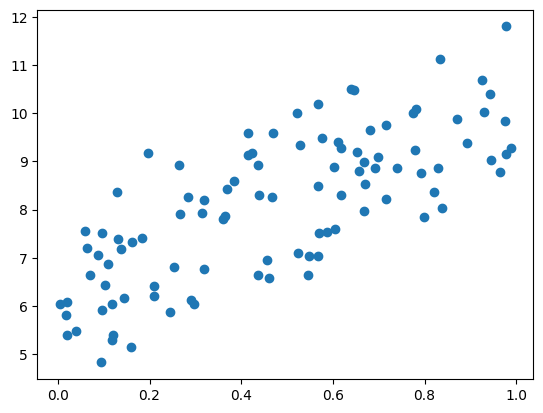

In [28]:
np.random.seed(0)

X = np.random.rand(100, 1)
# print(X.shape)
# print(X)

noise = np.random.randn(100, 1)
y = 6 + 4 * X + noise

plt.scatter(X, y)
plt.show()

In [29]:
# 경사하강법 실행

# 회귀계수(가중치) 초기화
w0 = np.zeros((1, 1))
w1 = np.zeros((1, 1))

# 잔차 계산
y_pred = w0 + np.dot(X, w1)
diff = y - y_pred

# 학습률
learning_rate = 0.01

# 데이터 개수
N = len(X)

# w0 편미분 (w0를 갱신할 값)
w0_diff = -learning_rate * 2/N * np.sum(diff)
w0 = w0 - w0_diff

# w1 편미분 (w1을 갱신할 값)
w1_diff = -learning_rate * 2/N * np.dot(X.T, diff)
w1 = w1 - w1_diff

print(f'1회 업데이트된 회귀계수 w0: { w0 }, w1: { w1 }')

1회 업데이트된 회귀계수 w0: [[0.16167019]], w1: [[0.08298126]]


In [30]:
def gradient_descent(X, y, learning_rate=0.01, max_iter=1000):
    # 회귀계수(가중치) 초기화
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))

    # 데이터 개수
    N = len(X)

    for _ in range(max_iter):
        # 잔차 계산
        y_pred = w0 + np.dot(X, w1)
        diff = y - y_pred

        # w0 편미분 (w0를 갱신할 값)
        w0_diff = -learning_rate * 2/N * np.sum(diff)
        w0 = w0 - w0_diff

        # w1 편미분 (w1을 갱신할 값)
        w1_diff = -learning_rate * 2/N * np.dot(X.T, diff)
        w1 = w1 - w1_diff

        # 시각화
        # plt.figure(figsize=(3, 2))
        # plt.scatter(X, y)
        # plt.plot(X, y_pred, color='red')
        # plt.show()

    return w0, w1

In [31]:
w0, w1 = gradient_descent(X, y)

print(f'최종 회귀 계수(가중치): { w1 }')
print(f'최종 회귀 계수(절편): { w0 }')

최종 회귀 계수(가중치): [[3.77397397]]
최종 회귀 계수(절편): [[6.30473552]]


In [32]:
def cost_function(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2) / len(y_true)

In [33]:
y_pred = w0 + np.dot(X, w1)
print(cost_function(y, y_pred))

0.9946766142140662


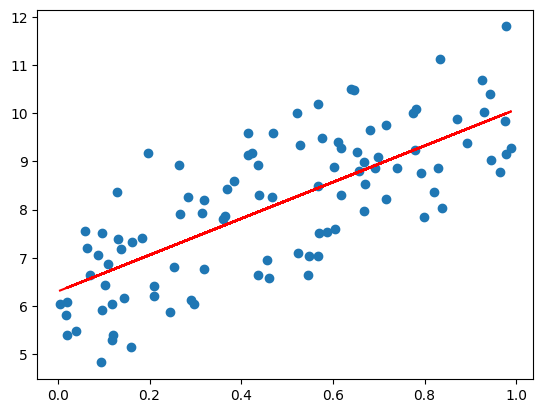

In [34]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [35]:
def mini_batch_gradient_descent(X, y, batch_size=10, learning_rate=0.01, max_iter=1000):
    # 회귀계수(가중치) 초기화
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))

    # 데이터 개수
    N = len(X)

    for _ in range(max_iter):
        # 미니배치 데이터 선정
        random_idx = np.random.permutation(X.shape[0])
        X_sample = X[random_idx[:batch_size]]
        y_sample = y[random_idx[:batch_size]]

        # 잔차 계산
        y_pred = w0 + np.dot(X_sample, w1)
        diff = y_sample - y_pred

        # w0 편미분 (w0를 갱신할 값)
        w0_diff = -learning_rate * 2/N * np.sum(diff)
        w0 = w0 - w0_diff

        # w1 편미분 (w1을 갱신할 값)
        w1_diff = -learning_rate * 2/N * np.dot(X_sample.T, diff)
        w1 = w1 - w1_diff

        # 시각화
        plt.figure(figsize=(3, 2))
        plt.scatter(X, y)
        plt.plot(X_sample, y_pred, color='red')
        plt.show()

    return w0, w1

In [36]:
random_idx = np.random.permutation(X.shape[0])
random_idx

array([66, 71, 54, 88, 82, 12, 36, 46, 14, 67, 10,  3, 62, 29, 97, 69, 70,
       93, 31, 73, 60, 96, 28, 27, 21, 19, 33, 78, 32, 94,  1, 41, 40, 76,
       37, 87, 24, 23, 50,  2, 47, 20, 77, 17, 56, 64, 68, 25, 15, 22, 16,
       98, 63, 92, 86, 38,  6, 57, 95, 44,  9, 42, 81, 99, 35, 84, 59, 48,
       75, 65, 85, 90, 55, 43, 58, 89, 30, 80, 34, 18, 51, 49, 52, 74, 26,
       45, 39,  4, 11, 53, 91, 79,  8,  0,  5, 13, 61, 72,  7, 83],
      dtype=int32)

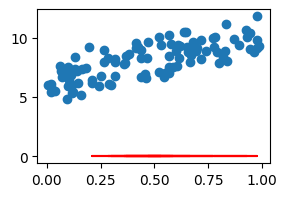

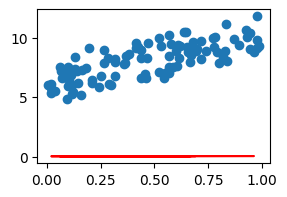

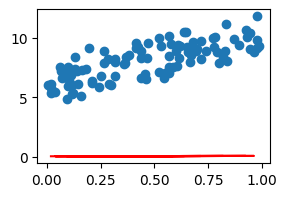

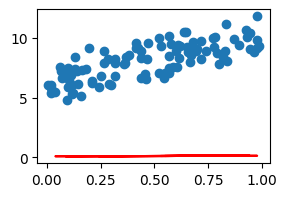

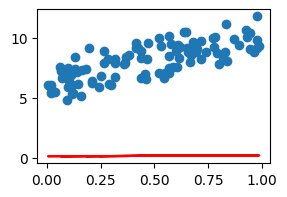

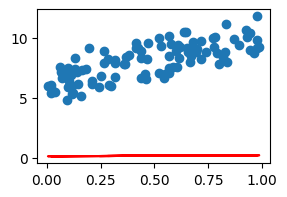

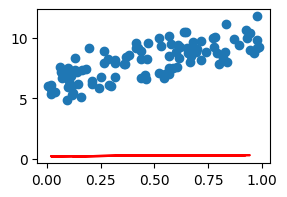

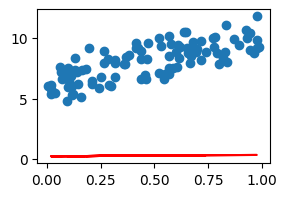

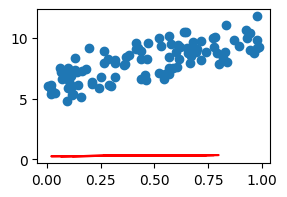

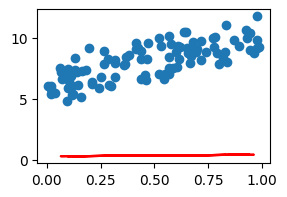

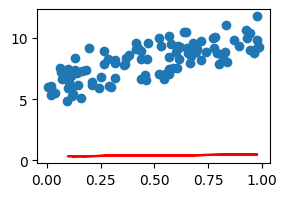

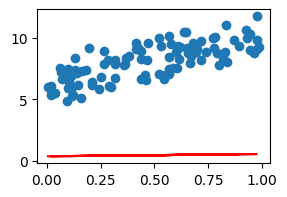

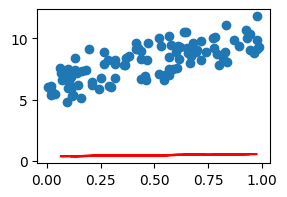

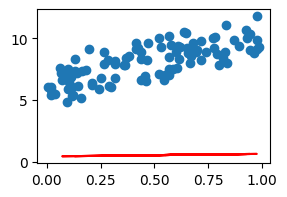

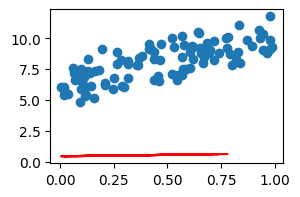

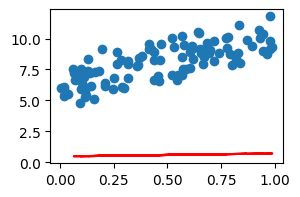

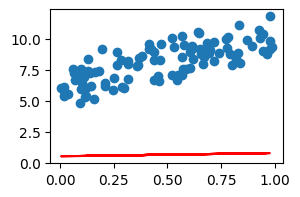

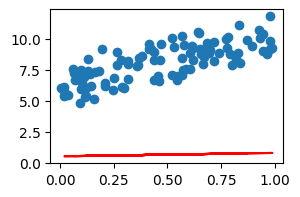

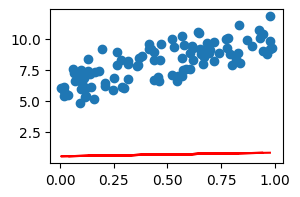

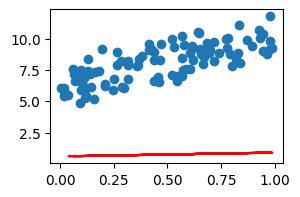

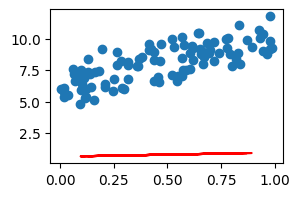

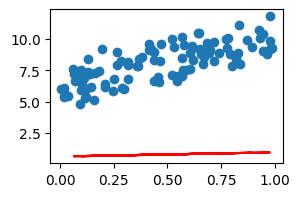

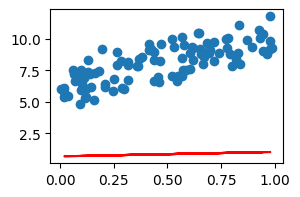

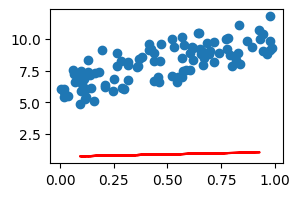

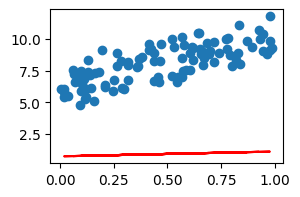

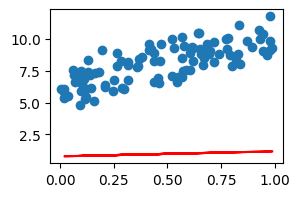

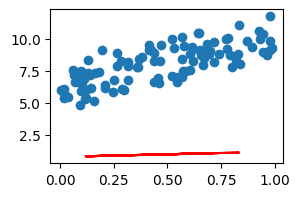

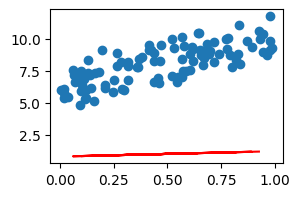

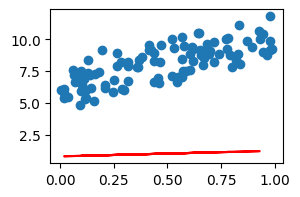

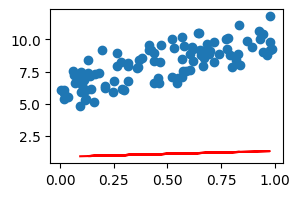

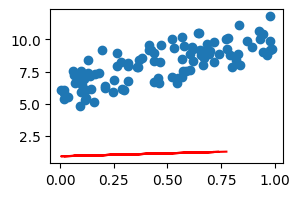

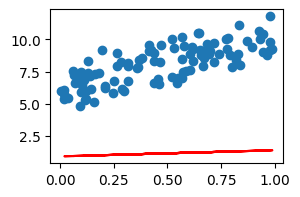

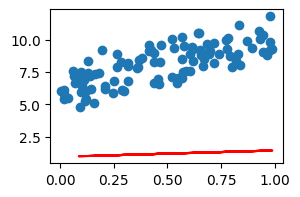

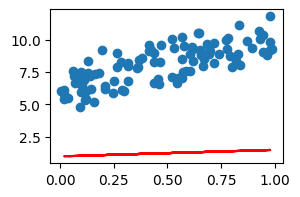

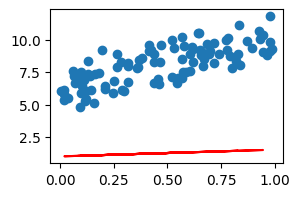

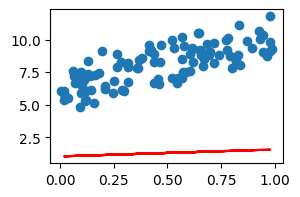

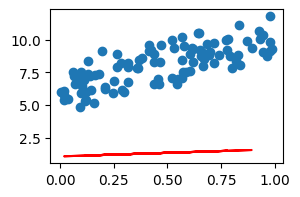

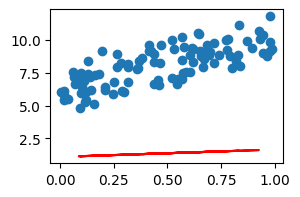

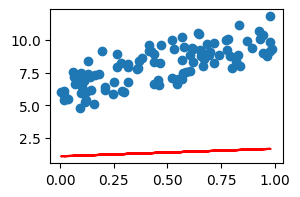

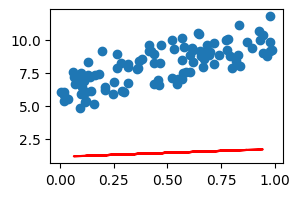

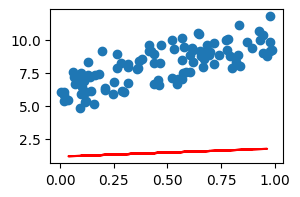

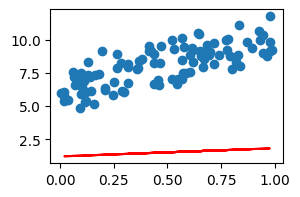

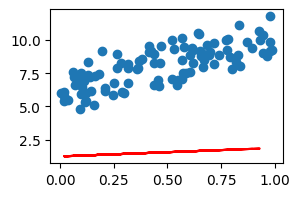

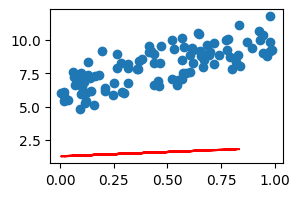

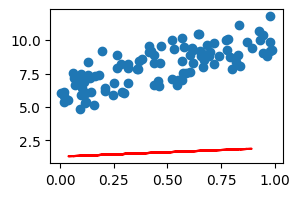

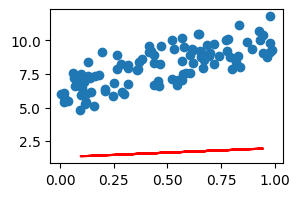

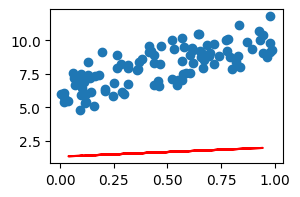

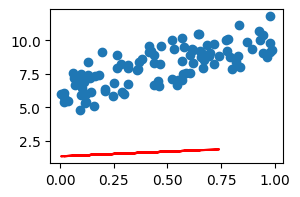

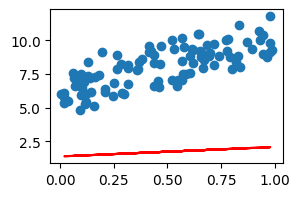

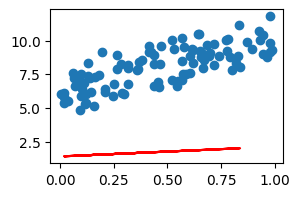

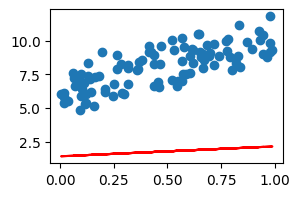

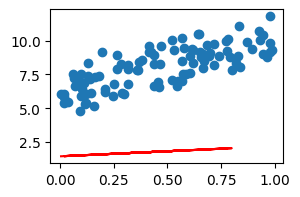

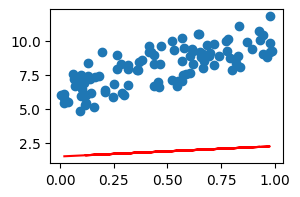

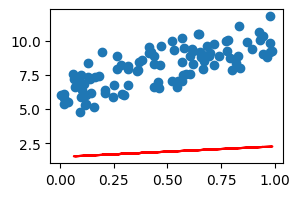

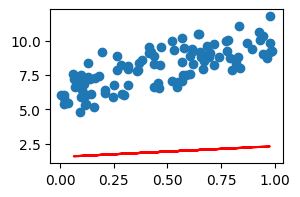

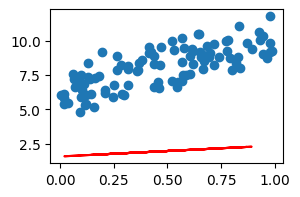

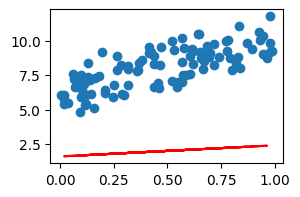

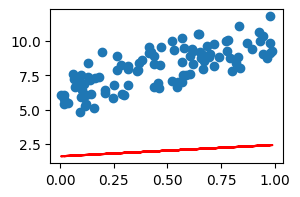

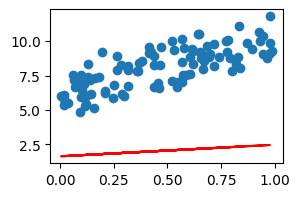

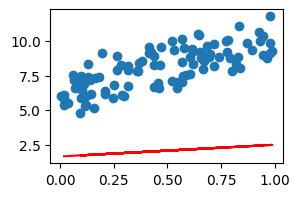

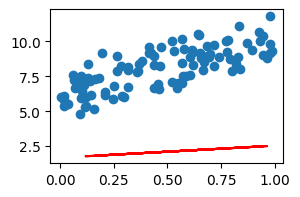

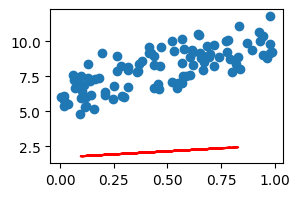

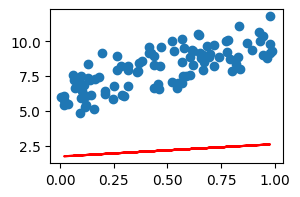

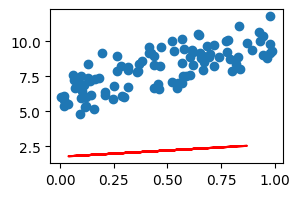

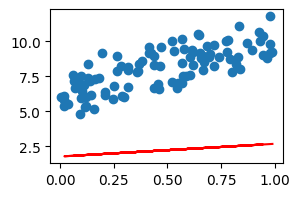

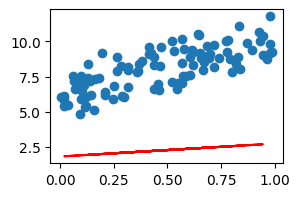

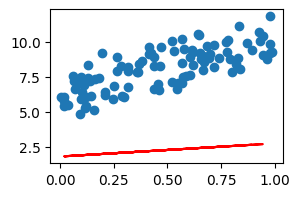

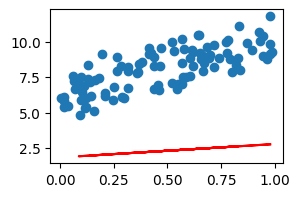

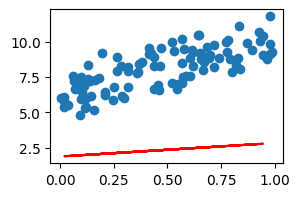

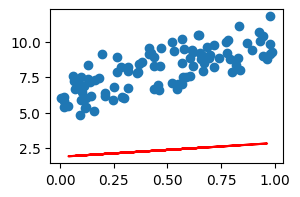

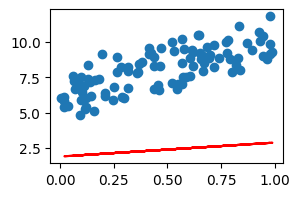

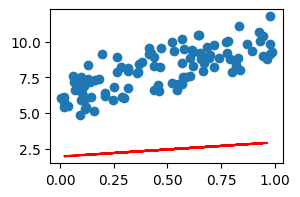

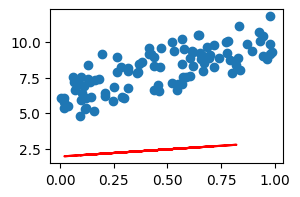

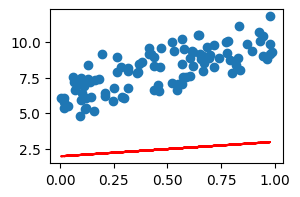

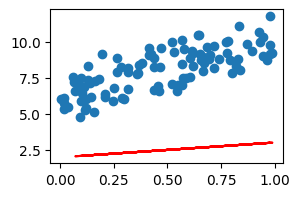

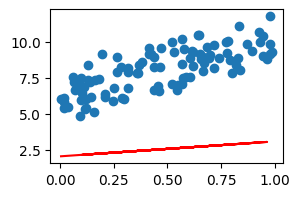

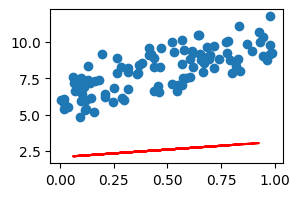

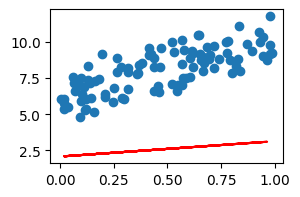

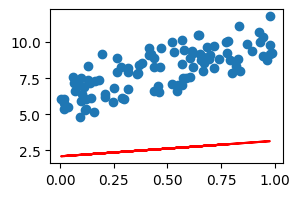

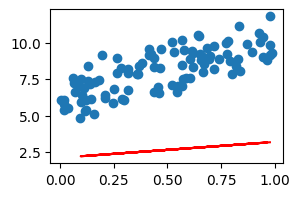

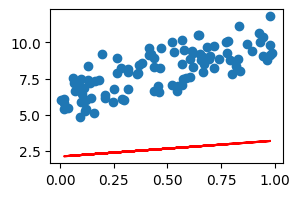

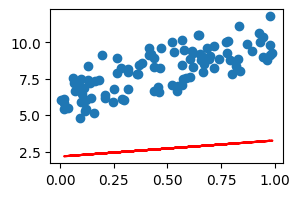

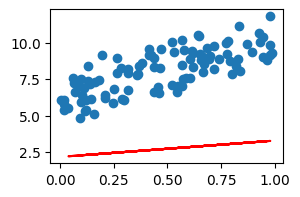

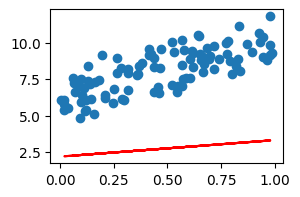

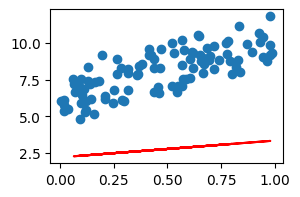

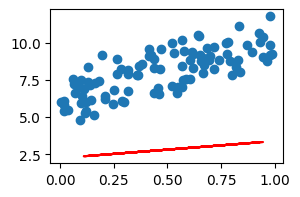

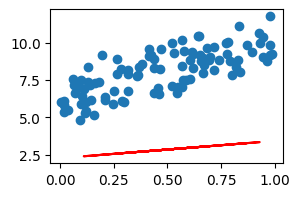

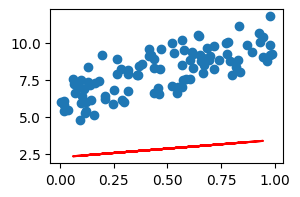

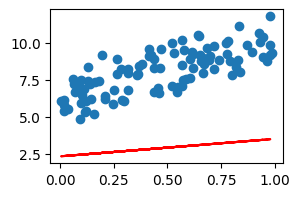

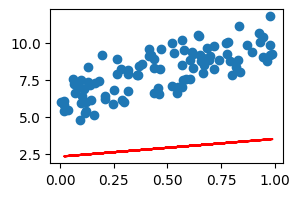

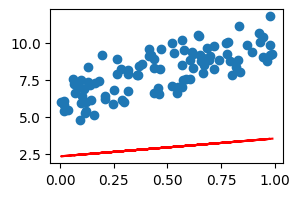

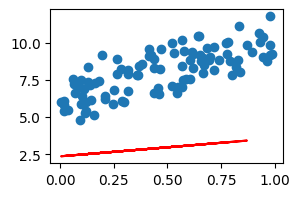

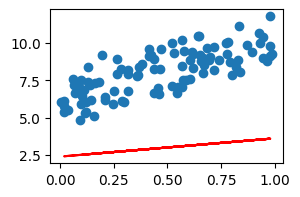

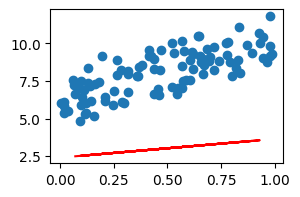

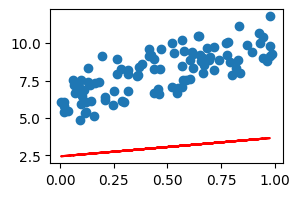

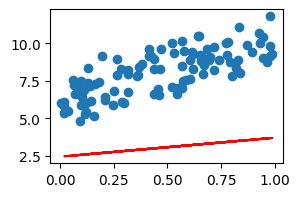

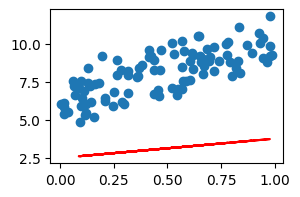

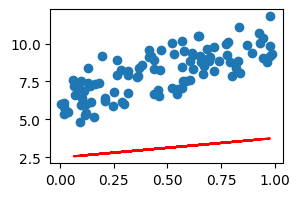

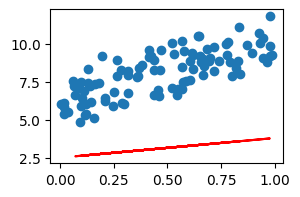

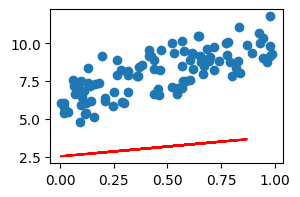

최종 회귀 계수(가중치): [[1.31328426]]
최종 회귀 계수(절편): [[2.54915749]]


In [38]:
w0, w1 = mini_batch_gradient_descent(X, y, batch_size=20, max_iter=100)

print(f'최종 회귀 계수(가중치): { w1 }')
print(f'최종 회귀 계수(절편): { w0 }')